# Problem statment

-We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

## Attribute Information:

- The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

- X1 Relative Compactness
- X2 Surface Area
- X3 Wall Area
- X4 Roof Area
- X5 Overall Height
- X6 Orientation
- X7 Glazing Area
- X8 Glazing Area Distribution
- y1 Heating Load
- y2 Cooling Load

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
pwd

'C:\\Users\\ved deo\\Downloads\\deep_learning_projects\\ineuron_ANN'

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense
from tensorflow import keras

In [184]:
df = pd.read_excel('ENB2012_data.xlsx')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [185]:
df.shape

(768, 10)

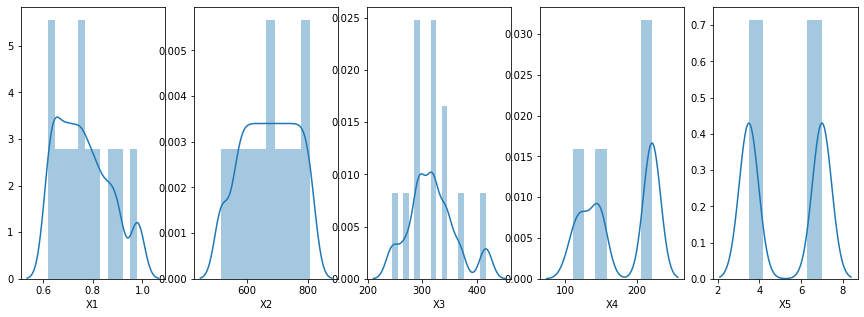

In [186]:
plt.figure(figsize=(15,5))
for i in range(0,5):
    plt.subplot(1, 5, i+1)
    plt.xticks(rotation=0)
    sns.distplot(df[df.columns[i]])

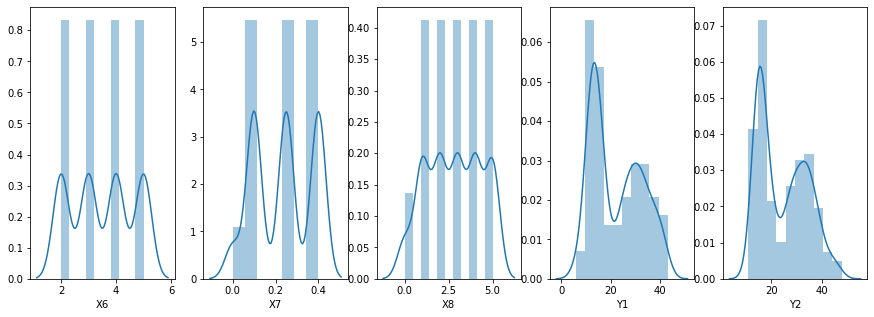

In [187]:
plt.figure(figsize=(15,5))
for i in range(5,10):
    plt.subplot(1, 5, i-4)
    plt.xticks(rotation=0)
    sns.distplot(df[df.columns[i]])

# Here two dependent co; lets take one column and then build model..

In [188]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [189]:
df_new = df.iloc[:,:-1]

In [190]:
df_new.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [191]:
X = df_new.drop('Y1',axis=1)
y = df_new['Y1']

In [192]:
from sklearn.model_selection import train_test_split

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(537, 8)
(231, 8)


In [194]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [195]:
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

In [196]:
y_train[:5]

402    39.81
748    12.43
606    14.40
253    23.89
361    12.45
Name: Y1, dtype: float64

In [197]:
max_ytrain = max(y_train)

In [198]:
y_train_scale = y_train/max(y_train)

In [199]:
y_train[:5]

402    39.81
748    12.43
606    14.40
253    23.89
361    12.45
Name: Y1, dtype: float64

In [200]:
max_ytrain

43.1

In [201]:
y_test[:5]

370    12.73
388    31.63
611    14.62
550    40.71
232    15.40
Name: Y1, dtype: float64

In [202]:
max_ytest = max(y_test)

In [203]:
max_ytest

42.96

In [204]:
y_test_scale = y_test/max(y_test)

In [205]:
y_test[:5]

370    12.73
388    31.63
611    14.62
550    40.71
232    15.40
Name: Y1, dtype: float64

In [211]:
model = Sequential()
model.add(Dense(30, input_dim=8,kernel_initializer='normal',activation='relu',kernel_regularizer=regularizers.l1(0.001)))
model.add(Dense(20, kernel_initializer='normal',activation='relu'))
model.add(Dense(10, kernel_initializer='normal',activation='relu'))
model.add(Dense(1,activation='linear',kernel_initializer='normal'))
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 30)                270       
_________________________________________________________________
dense_74 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_75 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_76 (Dense)             (None, 1)                 11        
Total params: 1,111
Trainable params: 1,111
Non-trainable params: 0
_________________________________________________________________


In [212]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
history = model.fit(X_train_scale, y_train_scale, validation_data=(X_test_scale,y_test_scale),epochs=50)

Epoch 1/50
17/17 [==============================] - 0s 14ms/step - loss: 0.3263 - mean_squared_error: 0.3186 - val_loss: 0.2934 - val_mean_squared_error: 0.2873
Epoch 2/50
17/17 [==============================] - 0s 5ms/step - loss: 0.2973 - mean_squared_error: 0.2921 - val_loss: 0.2600 - val_mean_squared_error: 0.2554
Epoch 3/50
17/17 [==============================] - 0s 5ms/step - loss: 0.2505 - mean_squared_error: 0.2457 - val_loss: 0.1963 - val_mean_squared_error: 0.1907
Epoch 4/50
17/17 [==============================] - 0s 5ms/step - loss: 0.1563 - mean_squared_error: 0.1494 - val_loss: 0.0809 - val_mean_squared_error: 0.0722
Epoch 5/50
17/17 [==============================] - 0s 6ms/step - loss: 0.0581 - mean_squared_error: 0.0482 - val_loss: 0.0487 - val_mean_squared_error: 0.0381
Epoch 6/50
17/17 [==============================] - 0s 6ms/step - loss: 0.0426 - mean_squared_error: 0.0326 - val_loss: 0.0335 - val_mean_squared_error: 0.0240
Epoch 7/50
17/17 [=====================

# Chcek R-square

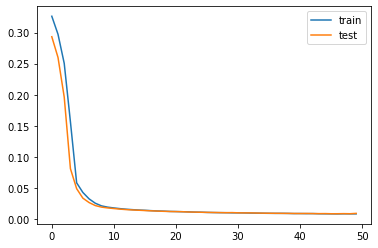

In [213]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [214]:
model.evaluate(X_train_scale,y_train)

17/17 [==============================] - 0s 1ms/step - loss: 585.1028 - mean_squared_error: 585.0999


[585.1028442382812, 585.099853515625]

In [222]:
predict_df = pd.DataFrame(y_test_scale)
predict_df.columns = ['Y1']

In [223]:
predict_df['predict_Y1'] = model.predict(X_test_scale)

In [224]:
predict_df.head()

,Y1,predict_Y1
370,0.296322,0.275236
388,0.736266,0.693586
611,0.340317,0.336935
550,0.947626,0.861858
232,0.358473,0.263346


In [225]:
max_ytest

42.96

In [226]:
predict_df[['Y1','predict_Y1']] = predict_df[['Y1','predict_Y1']]*max_ytest

In [227]:
predict_df.head()

,Y1,predict_Y1
370,12.73,11.824123
388,31.63,29.796440
611,14.62,14.474716
550,40.71,37.025436
232,15.40,11.313365


<Figure size 1080x576 with 0 Axes>

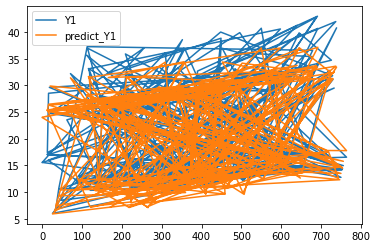

In [228]:
plt.figure(figsize=(15,8));
predict_df.plot();
plt.show();

In [229]:
import sklearn.metrics as sm

In [230]:
print("R2 score =", round(sm.r2_score(predict_df.Y1, predict_df.predict_Y1), 2))

R2 score = 0.89
